# **Projeto de Machine Lerning DIO**
 ## **Criando modelos com Python e Machine Learning para prever a evolução do COVID-19 no Brasil**
 
[![author](https://img.shields.io/badge/author-evaldojunior-red.svg)](https://www.linkedin.com/in/evaldo-junior-89094244/) [![](https://img.shields.io/badge/python-3.9+-blue.svg)](https://www.python.org/downloads/release/python-365/) [![GPLv3 license](https://img.shields.io/badge/License-GPLv3-blue.svg)](http://perso.crans.org/besson/LICENSE.html)

<p align="center">
  <img src="COVID.png" >
</p>

## **SOBRE O PROJETO**

Este projeto tem por objetivo cumprir a ultima etapa do curso de 
Criando modelos com Python e Machine Learning para prever a evolução do COVID-19 no Brasil

A ideia central é desenvolver um modelo para prever os casos de covid19 no brasil utilizando modelos de machine Learning.


>Durante as aulas o professor Neylson utilizou a biblioteca <font color ="red">fbprophet</font>, porém, para este projeto eu farei a predição com a biblioteca <font color = 'red'>statsmodels</font>

---

## **SOBRE OS DADOS**

- **SNo** - Número de controle interno (Sequencial)
- **ObservationDate** - Data em que a contagem dos casos foi realizada
- **Province/State** - Estado onde o caso foi registrado
- **Country/Region** - Pais onde o caso foi registrado
- **Last Update** - Data e hora da ultima atualização
- **Confirmed** - Quantidade de casos confirmados
- **Deaths**- Quantidade de óbitos
- **Recovered** - Quantidade de pessoas curadas




---

## **1.1.ANÁLISE EXPLORATÓRIA DOS DADOS**

Começo o trabalho tentando entender melhor os dados. 
Faço a importação e já rodo o head e tail para ter uma noção do que tenho em mãos. 
Logo em seguida, já parto para a verificação de dados nulos. De cara já dá para ver que a coluna Province/State tem uma porrada de dados faltantes.

Por último, verifico se os tipos de dados estão condizentes com o que tenho em mãos. 

Aparentemente, a única coisa não muito legal é a quantidade de dados faltantes, de resto, está tudo bem. 


In [1]:
import pandas as pd 
import numpy as np

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')


In [2]:
url = 'https://github.com/neylsoncrepalde/projeto_eda_covid/blob/master/covid_19_data.csv?raw=true'

df = pd.read_csv(url, parse_dates=['ObservationDate', 'Last Update'])
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [3]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0
26712,26713,2020-05-19,Zhejiang,Mainland China,2020-05-20 02:32:19,1268.0,1.0,1267.0


In [4]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     13831
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26713 entries, 0 to 26712
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              26713 non-null  int64         
 1   ObservationDate  26713 non-null  datetime64[ns]
 2   Province/State   12882 non-null  object        
 3   Country/Region   26713 non-null  object        
 4   Last Update      26713 non-null  datetime64[ns]
 5   Confirmed        26713 non-null  float64       
 6   Deaths           26713 non-null  float64       
 7   Recovered        26713 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 1.6+ MB


In [6]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

### **1.2.BRASIL**

Conforme visto nas aulas, o foco do estudo será o Brasil.

Por conta disso já começo fazendo um filtro.

Aqui tenho que relatar algo interessante.
Ao tentar fazer o filtro sem renomear as colunas, acabei enfrentando problemas. A consulta simplesmente não me retornava valor algum.
Então, acabei executando o código que o professor utilizou na aula para fazer o rename das colunas. Depois disso, consegui fazer os filtros de forma bastante tranquila.


In [7]:
import re
def corrige_colunas(col_name):
    return re.sub(r"[/| ]", "", col_name).lower()

df.columns = [corrige_colunas(col) for col in df.columns]

In [8]:
df

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


In [9]:
dfBrasil = df.query('countryregion == "Brazil"')

In [10]:
dfBrasil.head()

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0


### **1.3.Numero de Casos Confirmados**

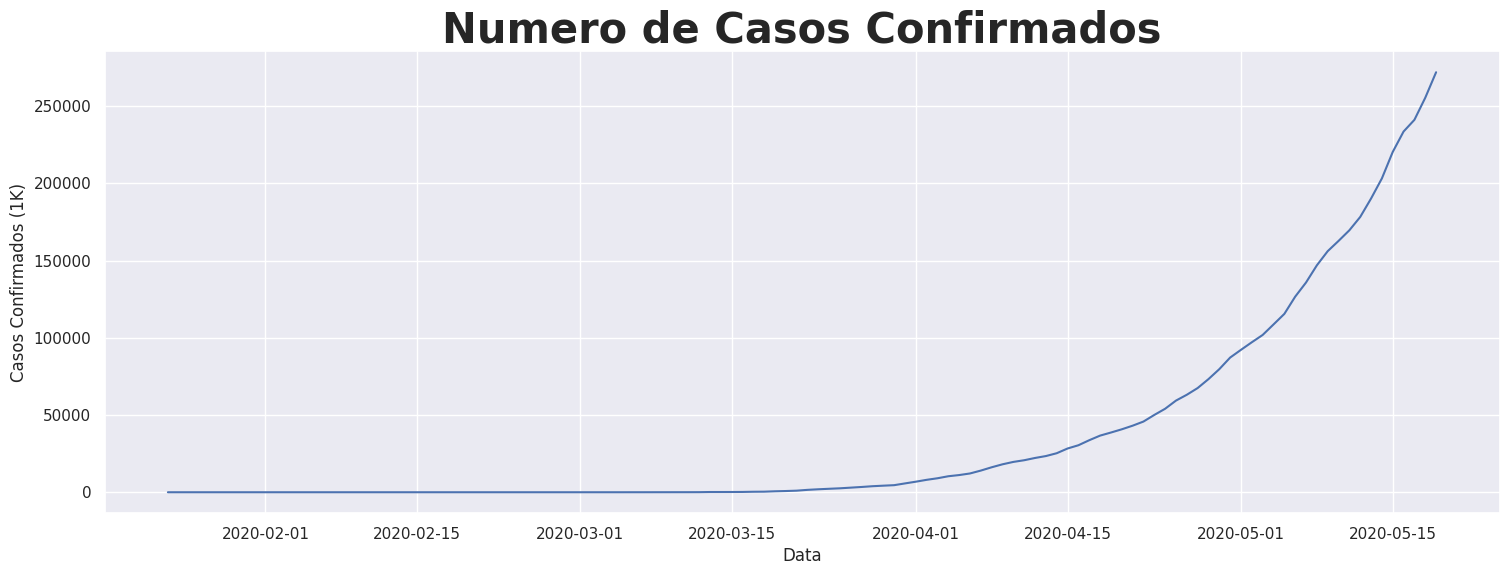

In [11]:
imagem = sns.lineplot(data = dfBrasil, x = 'observationdate', y = 'confirmed')
imagem.figure.set_size_inches(18,6)
imagem.set_ylabel('Casos Confirmados (1K)')
imagem.set_xlabel('Data')
imagem.set_title('Numero de Casos Confirmados', fontsize = 30, fontweight = 'bold');

### **1.4.Numero de Novos Casos**

Aqui criamos uma função lambda que é passada como parâmetro dentro de um método map.

Para que você entenda exatamente o que está acontecendo nesta célula eu vou te explicar passo a passo o que faz cada código desses.

Primeiro você deve ter notado que acabei criando uma coluna nova dentro do DataFrame dfBrasil. Fiz isso porque esta é justamente a coluna que irá armazenar o resultado do cálculo que irei fazer pegando sempre a o valor da linha atual e subtraindo do valor da linha anterior. 

Na sequência, note que estou transformando tudo o que está dentro do map em uma lista. 

Isso acontece porque o map por definição não me retorna valores, mas sim um map object, que é algo muito parecido com uma série de pandas, só que os valores não são visíveis. 

Na sequência, você vê a aplicação do map propriamente dito. Ele basicamente recebe dois parâmetros. O primeiro é a função que quero aplicar, e o segundo, é o local onde esta função será aplicada, que neste caso é nas 84 posições do meu DataFrame, isso foi informado com o np.arange do Numpy.
Outro ponto importante, O map me retorna um iterável, por isso não precisei realizar o for. O prórpio método já faz isso para mim.


In [12]:
dfBrasil = df.query('countryregion == "Brazil" & confirmed > 0')
dfBrasil.drop(['provincestate', 'sno'], axis = 1, inplace = True)
dfBrasil.head()

,observationdate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2020-02-26,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2020-02-27,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2020-02-28,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2020-02-29,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2020-03-01,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0


In [13]:
dfBrasil['novoscasos'] = list(map(
    lambda x: 0 if (x ==0) else dfBrasil['confirmed'].iloc[x] - dfBrasil['confirmed'].iloc[x -1],
    np.arange(dfBrasil.shape[0])
))

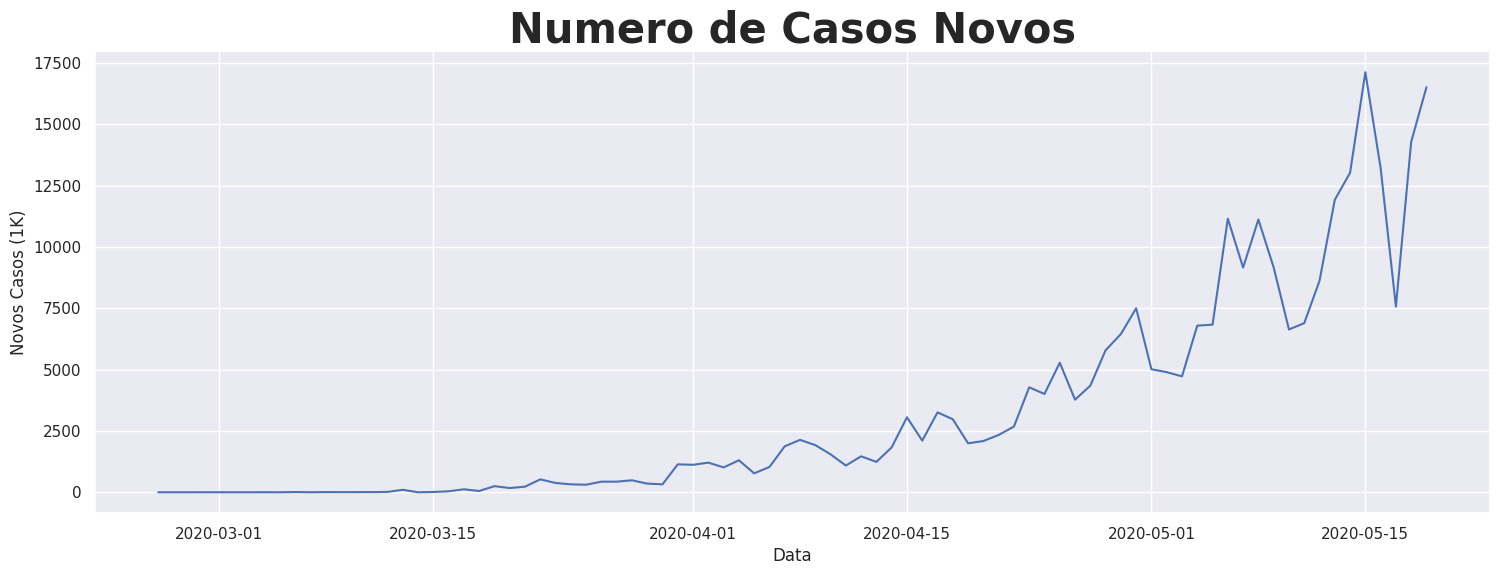

In [14]:
imagem = sns.lineplot(data = dfBrasil, x = 'observationdate', y = 'novoscasos')
imagem.figure.set_size_inches(18,6)
imagem.set_ylabel('Novos Casos (1K)')
imagem.set_xlabel('Data')
imagem.set_title('Numero de Casos Novos', fontsize = 30, fontweight = 'bold');

### **1.5.Média Móvel dos ultimos 5 dias**

Por este gráfico podemos facilmente notar que a média do número de mortos dos últimos 5 dias vem aumentando de forma significativa. 

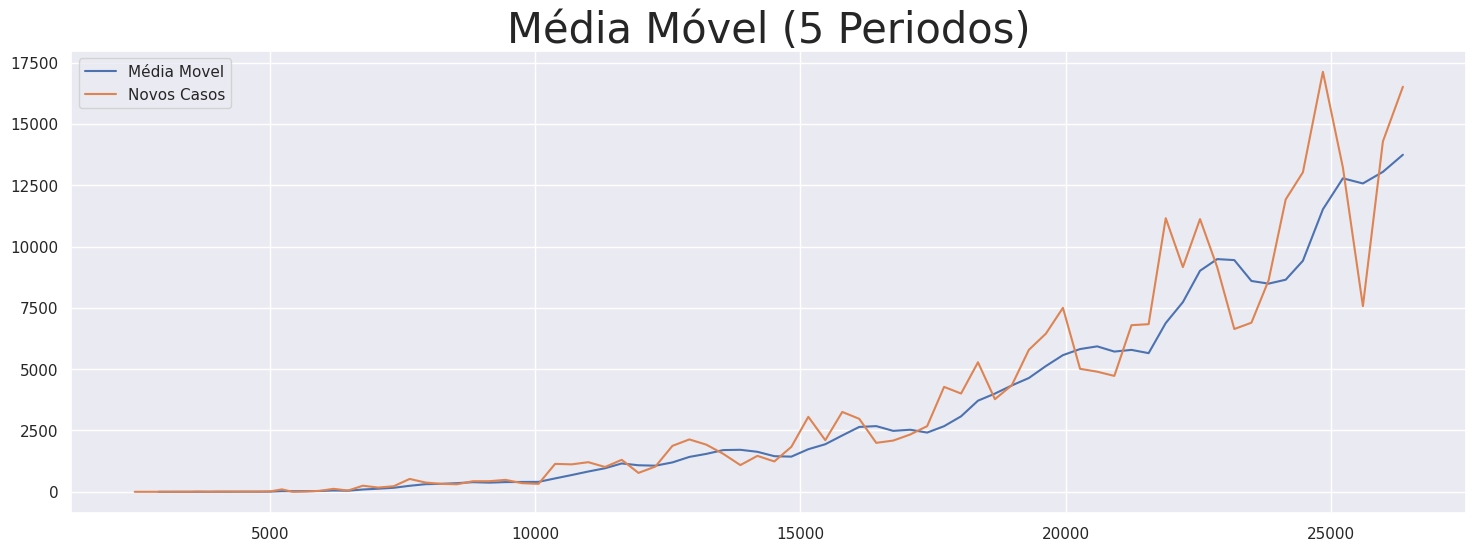

In [15]:
fig, ax = plt.subplots(figsize = (18,6))
dfBrasil['novoscasos'].rolling(5).mean().plot(label = 'Média Movel')
dfBrasil['novoscasos'].plot(figsize = (18,6), label = 'Novos Casos')
ax.set_title('Média Móvel (5 Periodos)', fontdict={'fontsize':30})
ax.legend();


### **1.6.Casos Confirmados X Mortes**

Aqui a ideia é justamente ver e comprovar o óbvio.

Podemos notar que a medida em que temos um aumento na quantidade de casos, temos também um aumento na quantidade de mortos. 

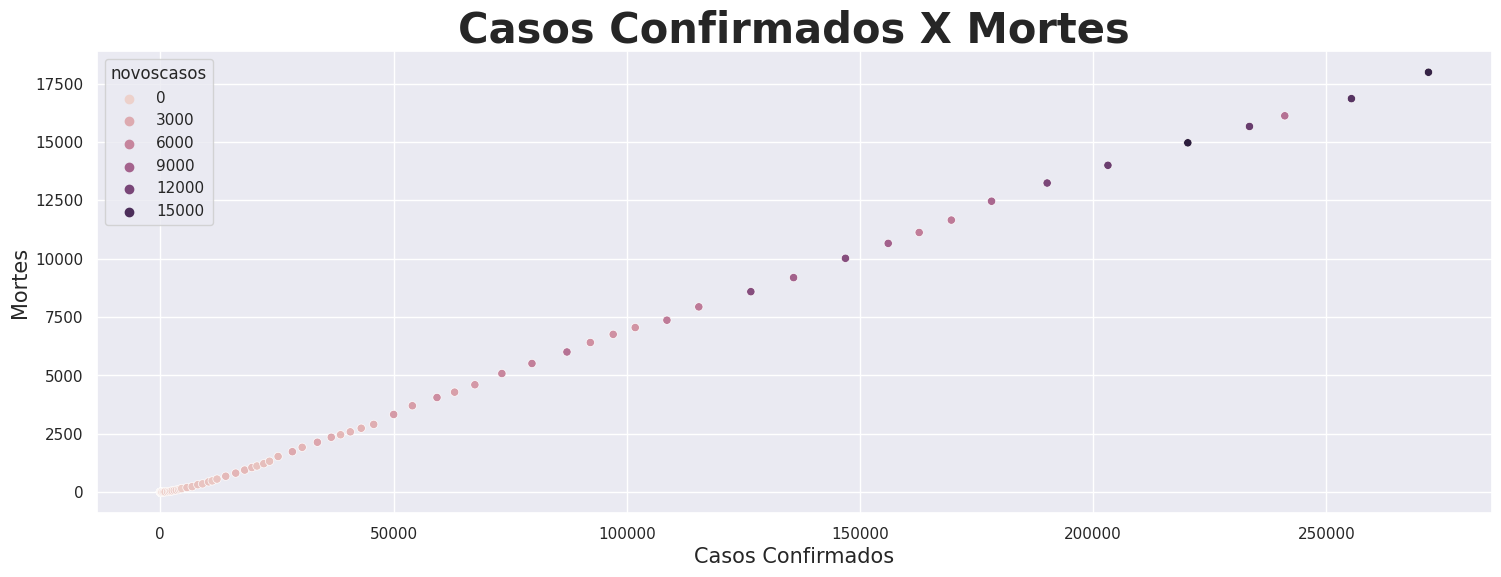

In [16]:
imagem = sns.scatterplot(data = dfBrasil, x = 'confirmed', y = 'deaths', hue= 'novoscasos')
imagem.figure.set_size_inches(18,6)
imagem.set_xlabel('Casos Confirmados', fontsize = 15)
imagem.set_ylabel('Mortes', fontsize = 15)
imagem.set_title('Casos Confirmados X Mortes', fontsize = 30, fontweight = 'bold');

### **1.7.Taxa Média de Crescimento**

Abaixo temos a fórmula para calcular a taxa de crescimento diário onde:

- **Presente** - Valor atual da minha série, ou ultimo valor do meu range
- **Passada** - Primeiro valor da minha séria, ou primeiro valor do meu range de consulta
- **n** - Quantidade de dias ou a diferença entre o passado e o presente 



<p>
  <img src="TaxaCrescimento.png" >
</p>

Como a ideia aqui é possibilitar consultas de formas dinâmicas, eu vou criar uma função onde serão passados os valores de data inicial e data final, assim como o campo onde quero realizar o cálculo. 

Com a mesma função eu posso por exemplo calcular a taxa de pessoas que se recuperam por exemplo. 


In [17]:
def taxaCrescimento(data, variable, dataInicio = None, dataFim = None):
    '''
        Data = Nome do Data Frame onde será realizada a consulta
        variable = Nome da coluna onde será realizada a consulta
        dataInicio = Data Inicial da consulta
        dataFim = Data final da consulta

        Se data de Inicio for None, o programa retornará a primeira data disponível na base de dados
    '''
    if dataInicio == None:     
        dataInicio = data['observationdate'].loc[data[variable]> 0].min() 
    else:
        dataInicio = pd.to_datetime(dataInicio)
    
    if dataFim == None:
        dataFim= data['observationdate'].iloc[-1]
    else:
        dataFim = pd.to_datetime(dataFim)

    # Pegando o valor com base nos parametros de consulta
    passado = data.loc[data['observationdate'] == dataInicio, variable].values[0]
    presente = data.loc[data['observationdate'] == dataFim, variable].values[0]

    # Definindo quantidade de dias
    n = (dataFim - dataInicio).days

    # Calculando a Taxa 
    taxa = (presente/passado)**(1/n) -1

    return taxa * 100

In [18]:
print(f'Taxa de Crescimento no Periodo é de {round(taxaCrescimento(dfBrasil, "confirmed"),2)} %')

Taxa de Crescimento no Periodo é de 16.27 %


### **1.8.Taxa de crescimento diário**

Agora quero calcular a taxa de crescimento diário.

Para isso irei criar uma função que recebe a data inicial como parâmetro e calcula o percentual de evolução do número de casos de forma diária

Para execução deste cálculo de taxa diária, o que estou utilizando é uma função chamada Percent Change. 

Quando a função for chamada, terei que passar o DataFrame, a Feature e a Data Inicial para realizar a consulta do período e também o filtro dos dados.


In [19]:

def taxaCrecimentoDiario(data, variable, dataInicio = None):
    '''
        Data = Nome do Data Frame onde será realizada a consulta
        variable = Nome da coluna onde será realizada a consulta
        dataInicio = Data Inicial da consulta

        Se data de Inicio for None, o programa retornará a primeira data disponível na base de dados
    '''

    if dataInicio == None:     
        dataInicio = data['observationdate'].loc[data[variable]> 0].min() 
    else:
        dataInicio = pd.to_datetime(dataInicio)

    dataFim = data['observationdate'].max()

    taxa = data[variable].loc[(data['observationdate'] >= dataInicio) & (data['observationdate'] <= dataFim)]

    return taxa.pct_change() * 100


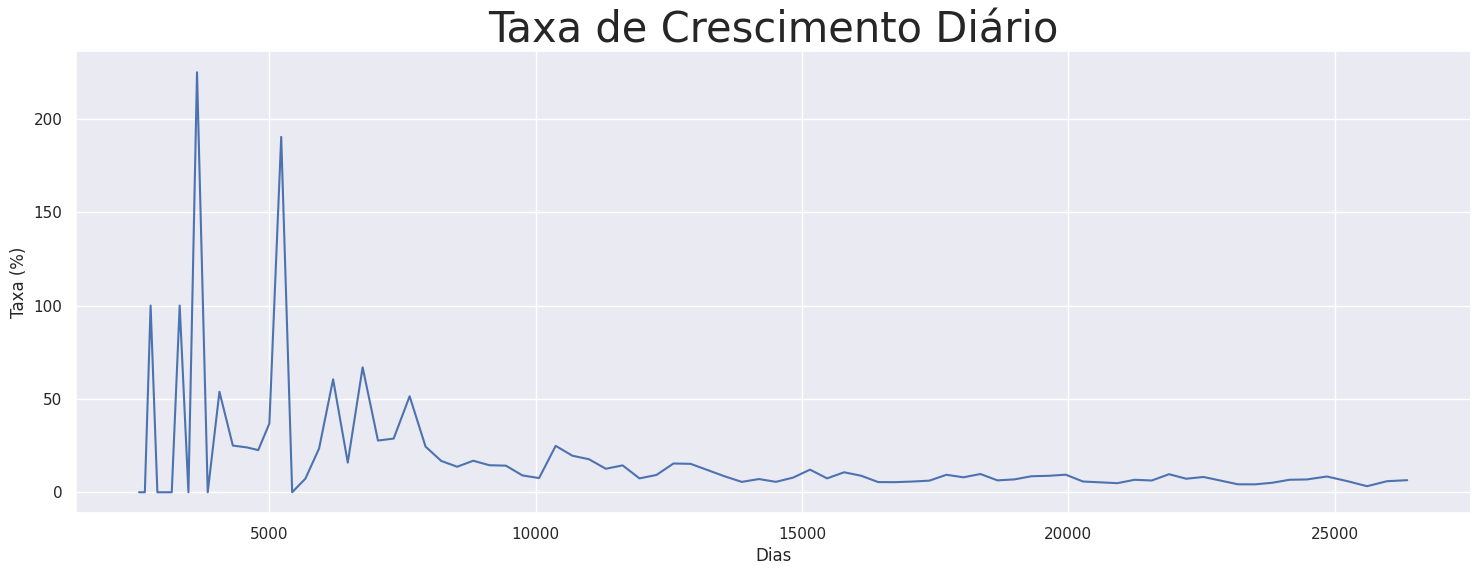

In [20]:
fig, ax = plt.subplots(figsize = (18,6))
ax.set_title('Taxa de Crescimento Diário', fontdict={'fontsize':30})
ax.set_xlabel('Dias')
ax.set_ylabel('Taxa (%)')
plt.plot(taxaCrecimentoDiario(dfBrasil, 'confirmed'));

---

## **2.0.Calculo das Previsões**

In [21]:
temp = dfBrasil.copy()
temp.head()

,observationdate,countryregion,lastupdate,confirmed,deaths,recovered,novoscasos
2455,2020-02-26,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2559,2020-02-27,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2668,2020-02-28,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2776,2020-02-29,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,1.0
2903,2020-03-01,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,0.0


### **2.1.Decomposição da Série**

A decomposição consiste no procedimento de dividir uma série temporal em várias séries diferentes, tendencia, sazonalidade e flutuação aleatória ou residual. 

A tendência fornece uma ideia sobre a tendência subjacente de seus dados (por exemplo, para cima ou para baixo). O componente sazonal fornece uma ideia sobre os padrões sazonais de seus dados - você geralmente tem períodos fixos de tempo, por exemplo, 12 meses. Flutuações aleatórias também chamadas de ruído, irregular ou resto, são os resíduos originais da série temporal após a remoção da tendência e um componente sazonal. Dessa forma, através da utilização de todos os três componentes, você pode reconstruir os valores originais da série temporal.


Abaixo, podemos notar uma forte tendência de alta olhando para média da série e também uma certa sazonalidade dos dados.
Também podemos notar que a medida em que o numero de casos aumenta, aumenta também o resíduo dos dados. 


In [22]:
temp.index = temp['observationdate']

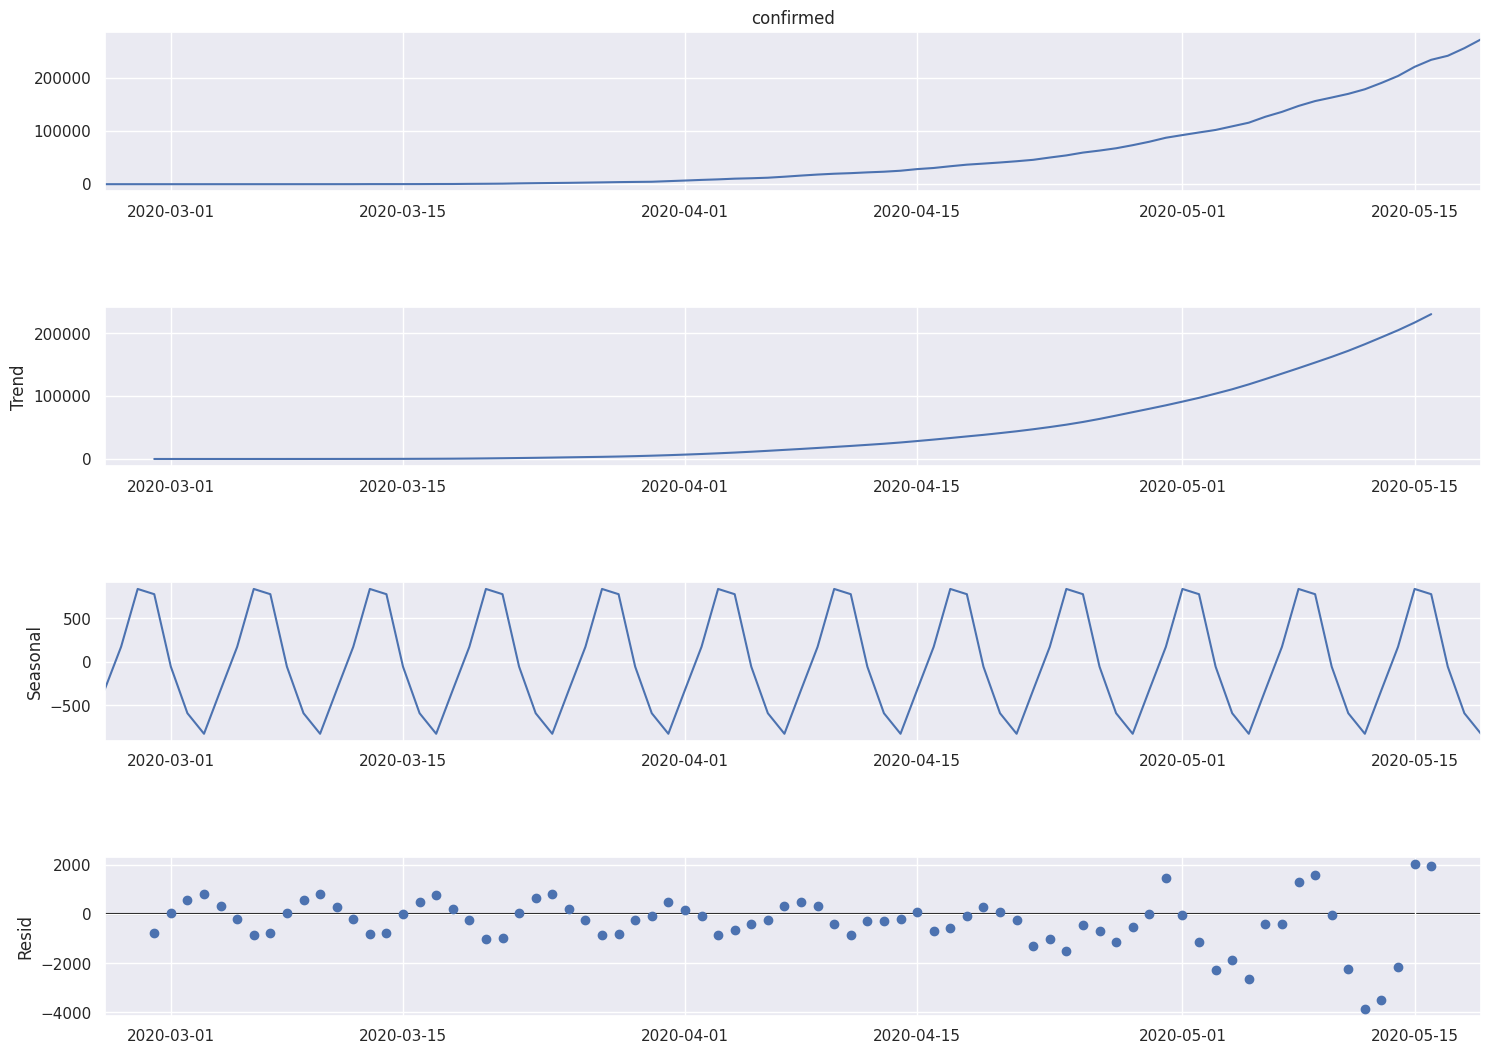

In [23]:
decomposicao = seasonal_decompose(temp['confirmed'])
fig = decomposicao.plot()
fig.set_size_inches(18,12)

### **2.3.Teste de Estacionariedade**


É importante saber que quando estamos trabalhando com séries temporais uma das tarefas que temos que executar é o teste de estacionariedade. 

Através dele vou saber se a série de dados que estou trabalhando é estacionária ou não. Ela sendo, existem técnicas de previsão que podem ser empregadas na base. Não sendo, as técnicas que serão empregadas, são outras. 

Para verificar se a base é estacionária ou não, irei utilizar o teste de Add Fuller. 

Aqui ideia de forma bastante simples é verificar se o p valor é maior do que 0,05. Sendo, existe uma grande possibilidade de série não ser estacionária, 


In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
# Verificando se a série é estacionária ou não
resultado = adfuller(temp['confirmed'])

print(f"P Valor: {round(resultado[1],3)}")


P Valor: 0.999


Conforme podemos ver, estamos diante de uma série que não é `estacionária`.

### **2.4.Prevendo Casos com Modelo Arima**

Antes de iniciar a aplicação do modelo propriamente dito, vamos gerar alguns diagramas para tentar entender ainda melhor os dados que temos em mãos. 

O primeiro gráfico tem o objetivo de nos mostrar se os dados de nossa série temporal possuem autocorrelação. 

Podemos notar que a grande maioria dos dados encontra-se dentro de 95% do intervalo de confiança, porém, temos alguns dados que estão fora, logo existe certa autocorrelação. 


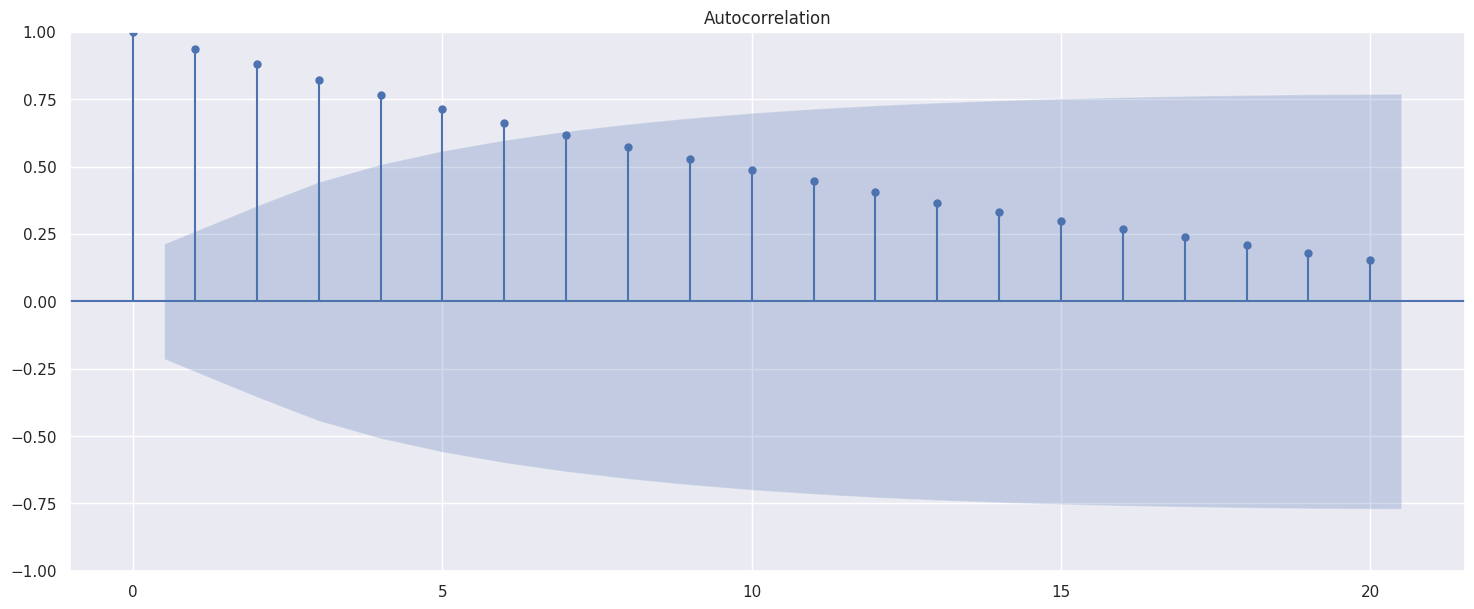

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
imagem = plot_acf(temp['confirmed'])
imagem.figure.set_size_inches(18,7)
imagem.show()

Já aqui no segundo gráfico, a ideia central é identificar sazonalidade. 

Podemos ver que existe certa sazonalidade, uma vez que temos pontos fora da área azul. 


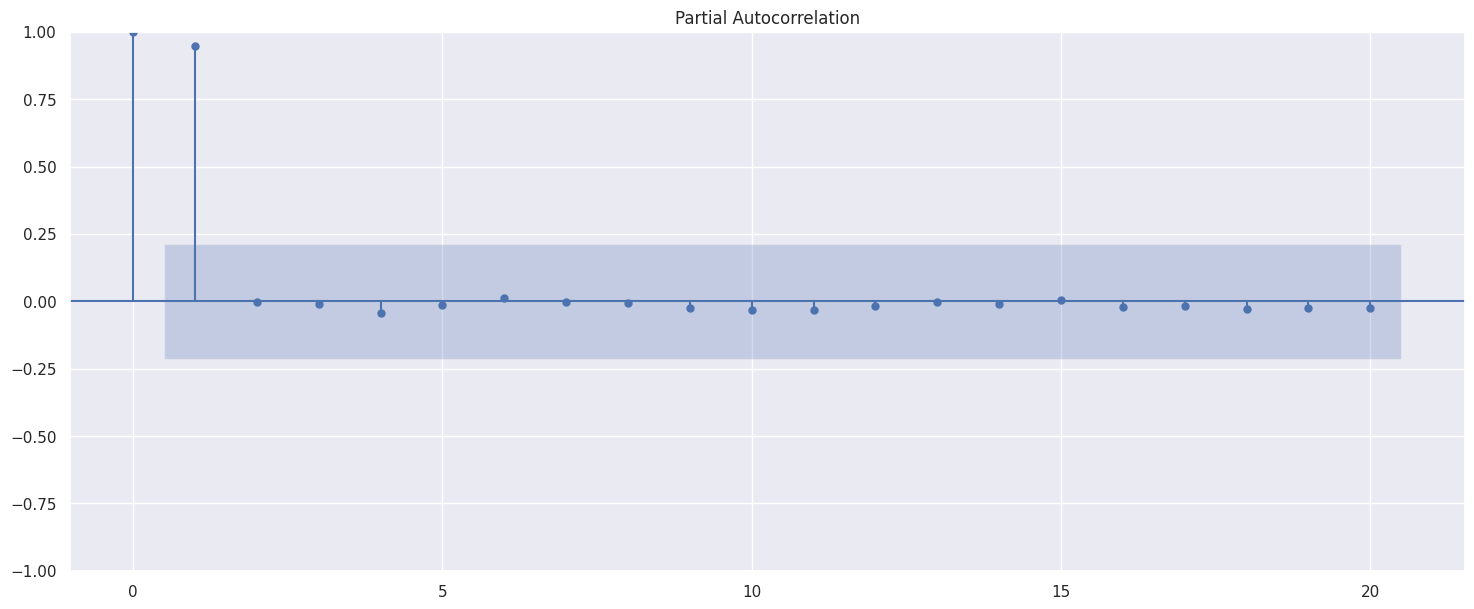

In [27]:
imagem = plot_pacf(temp['confirmed'])
imagem.figure.set_size_inches(18,7)
imagem.show()

In [28]:
# Separando os dados entre treino e teste

dados = temp['confirmed']
dadosIndice = temp['observationdate']
size = int(len(dados) * 0.8)

train, test = dados[0:size], dados[size: len(dados)]


In [29]:
dados.shape, dadosIndice.shape

((84,), (84,))

>O grande lance do auto_arima é que ao ser rodado, o próprio modelo tenta encontrar os melhores padrões de configuração. 

Basicamente é isso que estou fazendo na linha de baixo. 

In [30]:
# Criando o modelo Arima
from pmdarima.arima import auto_arima

modeloArima = auto_arima(dados, start_p= 1, start_q= 1, max_p= 6, max_q= 6, m=12, start_P= 0,
                        seasonal= True, trace= False, error_action= 'ignore', suppress_warnings= True, stepwise= True)


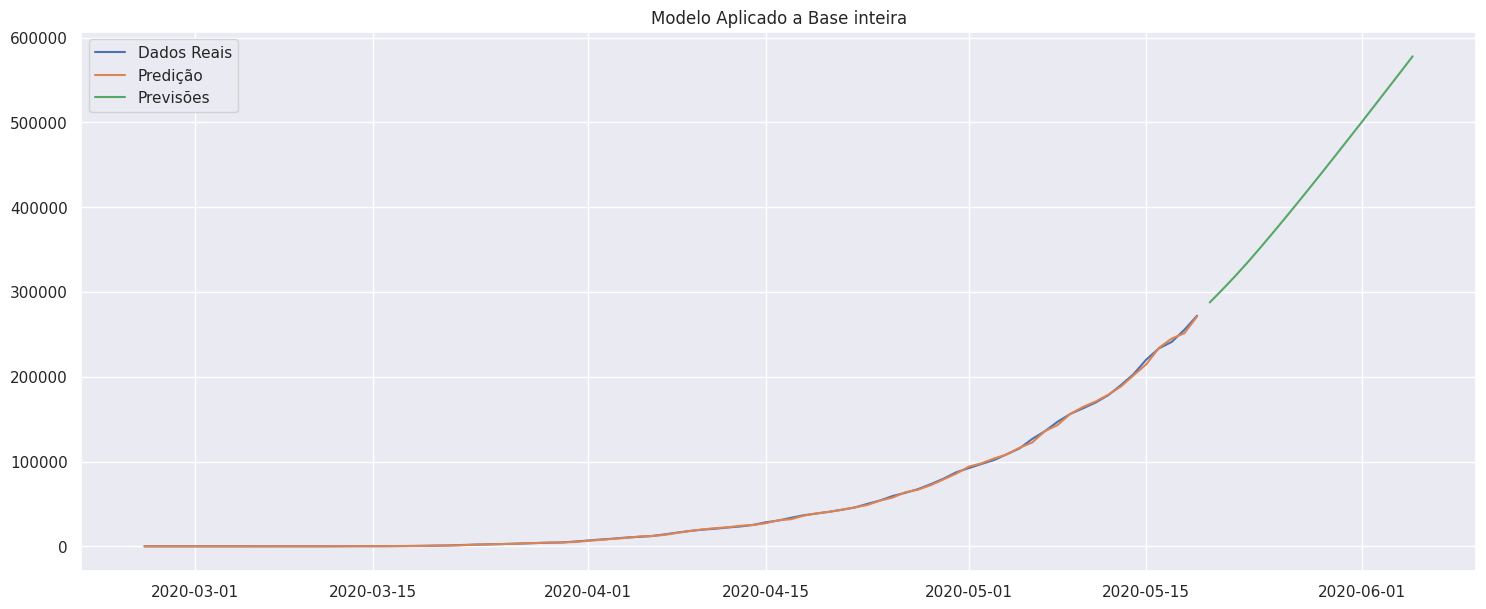

In [31]:
x = dadosIndice
y = dados

fig, ax = plt.subplots(figsize = (18,7))
ax.set_title("Modelo Aplicado a Base inteira")
plt.plot(x,y, label = 'Dados Reais')
plt.plot(x,modeloArima.predict_in_sample(), label = 'Predição')
plt.plot(pd.date_range('2020-05-20', '2020-06-05'), modeloArima.predict(17), label = 'Previsões');
plt.legend();


### **2.5.Aplicando Modelo Arima em Dados de Treino e Teste**

In [32]:
# Treinamento do modelo
modeloArima.fit(train)

ARIMA(order=(3, 2, 2), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [33]:
# Armazenando os dados de previsão em um DataFrame
previsoes = modeloArima.predict(120)
previsoes = pd.DataFrame(previsoes, index = temp.index, columns=['Confirmados'])

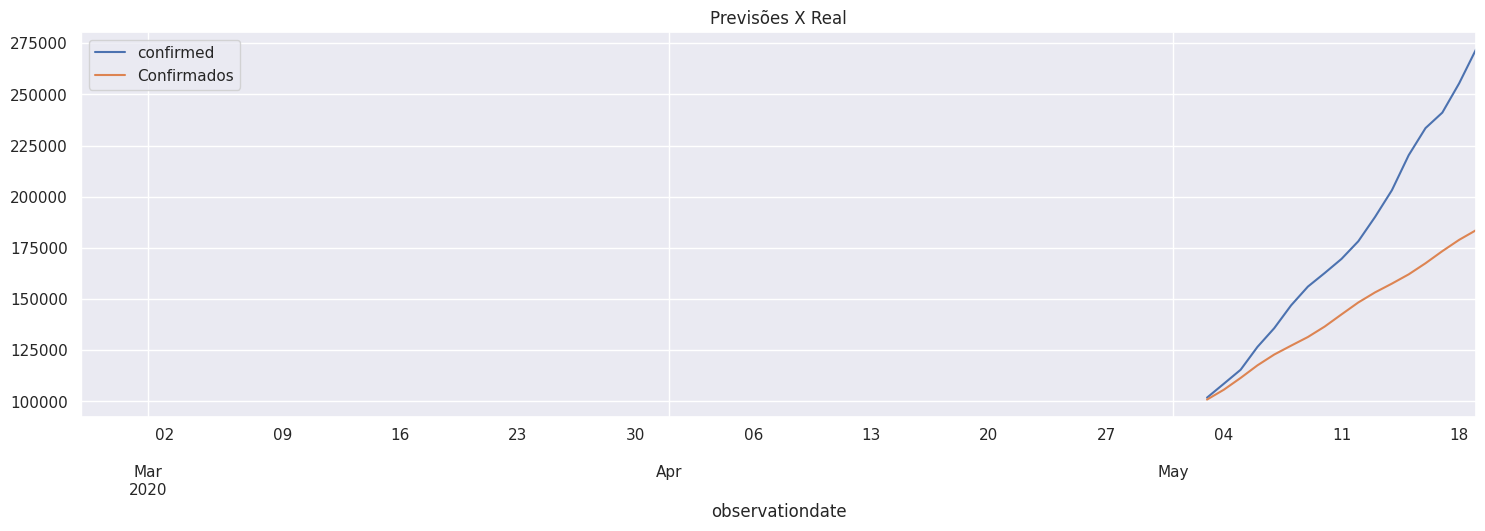

In [34]:
# Comparando Periodo de Testes com Previsões do Modelos
pd.concat([test, previsoes], axis = 1).plot(figsize = (18,5), title = 'Previsões X Real');

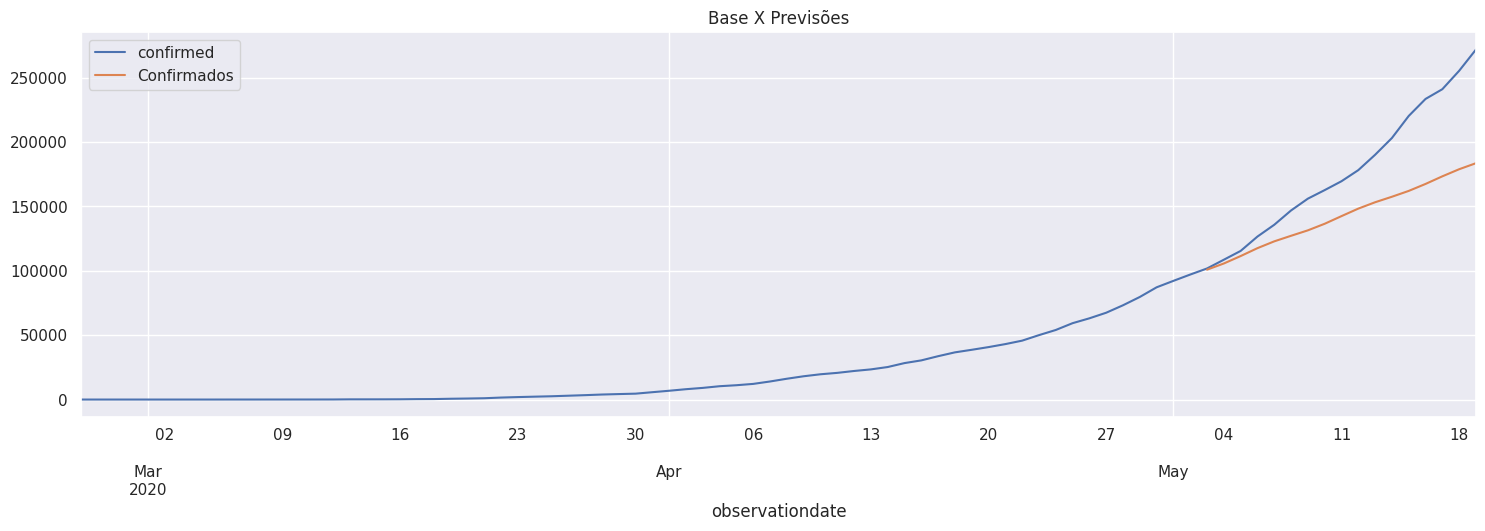

In [35]:
# Comparando Dados da Base com as Previsões do Modelo
pd.concat([temp['confirmed'], previsoes], axis = 1).plot(figsize = (18,5), title = 'Base X Previsões');

### **2.5.Impressões Modelo Arima**

O modelo Arima é sem dúvida alguma um dos modelos mais poderosos quando o assunto é Série Temporal. Porém, para esta base de dados parece que não tivemos uma boa performance.

O próximo passo é testar outro tipo de modelo para ver se obtenho melhora nos resultados.


---

### **3.MODELO Prophet**

Antes de mais nada deixa eu começar explicando o porque eu não estou utilizando a ferramenta do google para resolver o exercício. 

Eu fiz de tudo para tentar instalar na minha máquina e não consegui.

Por isso, estou utilizando uma rede neural para fazer o trabalho.


In [39]:
from fbprophet import Prophet

In [ ]:
# preparando os dados
train = dfBrasil.reset_index()[:-5]
test = dfBrasil.reset_index()[-5:]

# renomeia colunas
train.rename(columns={"observationdate":"ds","confirmed":"y"},inplace=True)
test.rename(columns={"observationdate":"ds","confirmed":"y"},inplace=True)
test = test.set_index("ds")
test = test['y']

profeta = Prophet(growth="logistic", changepoints=['2020-03-21', '2020-03-30', '2020-04-25', '2020-05-03', '2020-05-10'])

#pop = 1000000
pop = 211463256 #https://www.ibge.gov.br/apps/populacao/projecao/box_popclock.php
train['cap'] = pop

# Treina o modelo
profeta.fit(train)

# Construindo previsões para o futuro
future_dates = profeta.make_future_dataframe(periods=200)
future_dates['cap'] = pop
forecast =  profeta.predict(future_dates)

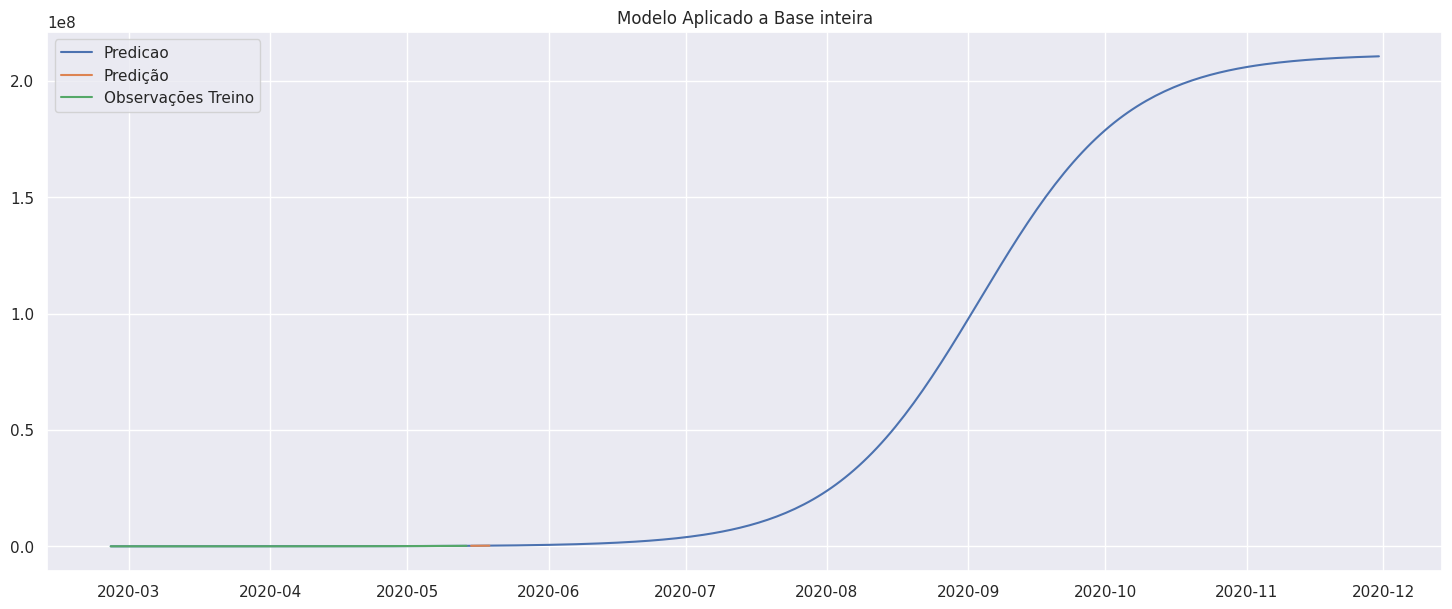

In [38]:
fig, ax = plt.subplots(figsize = (18,7))
ax.set_title("Predições de Casos no Brasil")
plt.plot(forecast.ds,forecast.yhat, label = 'Predicao')
plt.plot(test.index, test, label = 'Observados Teste')
plt.plot(train.ds, train.y, label = 'Observados Treino');
plt.legend();

## **4.CONCLUSÃO**


Com toda honestidade do mundo, a série temporal é ainda um assunto muito pouco explorado por mim. 

Já vi que as aplicações podem me  auxiliar bastante no meu dia a dia no trabalho e já na segunda-feira iniciarei os estudos práticos. 

Outro ponto interessante é que não consegui instalar a biblioteca do Facebook da forma como estava descrito no notebook da aula. 

Tive que criar vários ambientes com versões diferentes do Python e em todas as versões tive problema na instalação.

A única forma que encontrei de fazer a biblioteca ser instalada na minha máquina foi através destes comandos executados nesta ordem:

!pip install pystan~=2.14 

!pip install fbprophet

No mais, agora é cair para dentro da série temporal e ficar fera no assunto. 

